In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
StHomoCampaigns_4StHomoResourcesGA = pd.read_csv('../Data/ga/perc_100/StHomoCampaigns_4StHomoResourcesGA.csv')
StHomoCampaigns_4StHomoResourcesGA25 = pd.read_csv('../Data/ga/perc_075/StHomoCampaigns_4StHomoResourcesGA25.csv')
StHomoCampaigns_4StHomoResourcesGA50 = pd.read_csv('../Data/ga/perc_050/StHomoCampaigns_4StHomoResourcesGA50.csv')

StHomoCampaigns_4StHomoResourcesGA.drop(['plan', 'time'], axis=1, inplace=True)
StHomoCampaigns_4StHomoResourcesGA25.drop(['plan', 'time'], axis=1, inplace=True)
StHomoCampaigns_4StHomoResourcesGA50.drop(['plan', 'time'], axis=1, inplace=True)

In [3]:
ConvGA = pd.DataFrame(columns=['count', 'total'])
ConvGA25 = pd.DataFrame(columns=['count', 'total'])
ConvGA50 = pd.DataFrame(columns=['count', 'total'])
for i in [4,8,16,32,64,128,256,512,1024]:
    ConvGA.loc[i] = [0,0]
    ConvGA25.loc[i] = [0,0]
    ConvGA50.loc[i] = [0,0]

for idx, row in StHomoCampaigns_4StHomoResourcesGA.iterrows():
    if row['makespan'] == (75000 * row['size'] / 4):
        ConvGA.loc[row['size']]['count'] += 1
    ConvGA.loc[row['size']]['total'] += 1


for idx, row in StHomoCampaigns_4StHomoResourcesGA25.iterrows():
    if row['makespan'] == (75000 * row['size'] / 4):
        ConvGA25.loc[row['size']]['count'] += 1
    ConvGA25.loc[row['size']]['total'] += 1
    

for idx, row in StHomoCampaigns_4StHomoResourcesGA50.iterrows():
    if row['makespan'] == (75000 * row['size'] / 4):
        ConvGA50.loc[row['size']]['count'] += 1
    ConvGA50.loc[row['size']]['total'] += 1


In [4]:
ConvGA25

,count,total
4,100,100
8,97,100
16,99,100
32,99,100
64,100,100
128,100,100
256,100,100
512,100,100
1024,100,100


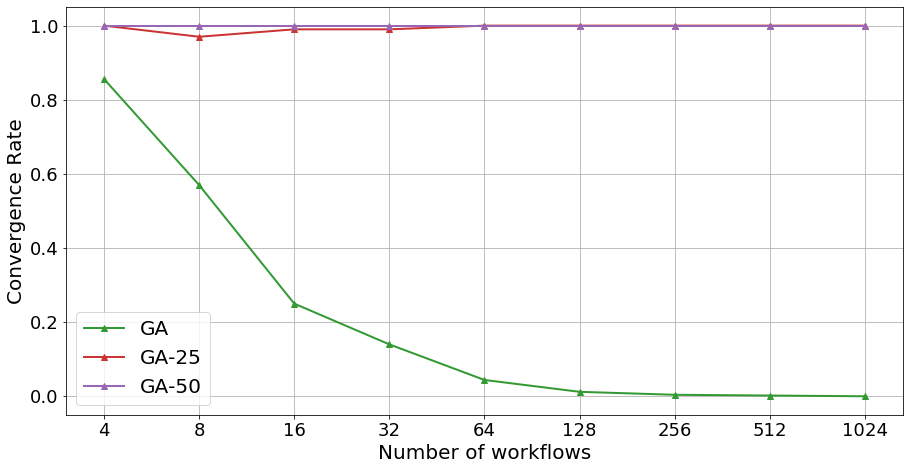

In [5]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(ConvGA.index, ConvGA['count'] / ConvGA['total'], color=tableau20(4), marker='^', label='GA', linewidth=2)
_ = axis.errorbar(ConvGA25.index, ConvGA25['count'] / ConvGA25['total'], color=tableau20(6),marker='^', label='GA-25',linewidth=2)
_ = axis.errorbar(ConvGA50.index, ConvGA50['count'] / ConvGA50['total'], color=tableau20(8),marker='^', label='GA-50',linewidth=2)
#_ = axis.errorbar([4, 8, 16, 32, 64, 128, 256, 512, 1024], min_vals, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_xscale('symlog', basex=2)
_ = axis.set_ylabel('Convergence Rate',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int'),fontsize=18)
_ = axis.set_yticklabels(np.around(axis.get_yticks().astype('float'), decimals=2),fontsize=18)
_ = axis.grid('on')
#_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
_ = fig.savefig('../Figures/StHomoCampaigns_4StHomoResourcesGAconv.pdf',bbox_inches='tight')

In [6]:
StHomoCampaigns_4StHomoResourcesGA = pd.read_csv('../Data/ga/perc_100/HomogeResources_StHomogeCampaignsGA.csv')
StHomoCampaigns_4StHomoResourcesGA25 = pd.read_csv('../Data/ga/perc_075/HomogeResources_StHomogeCampaignsGA25.csv')
StHomoCampaigns_4StHomoResourcesGA50 = pd.read_csv('../Data/ga/perc_050/HomogeResources_StHomogeCampaignsGA50.csv')

StHomoCampaigns_4StHomoResourcesGA.drop(['plan', 'time'], axis=1, inplace=True)
StHomoCampaigns_4StHomoResourcesGA25.drop(['plan', 'time'], axis=1, inplace=True)
StHomoCampaigns_4StHomoResourcesGA50.drop(['plan', 'time'], axis=1, inplace=True)

In [7]:
ConvGA = pd.DataFrame(columns=['count', 'total'])
ConvGA25 = pd.DataFrame(columns=['count', 'total'])
ConvGA50 = pd.DataFrame(columns=['count', 'total'])
for i in [4,8,16,32,64,128]:
    ConvGA.loc[i] = [0,0]
    ConvGA25.loc[i] = [0,0]
    ConvGA50.loc[i] = [0,0]

for idx, row in StHomoCampaigns_4StHomoResourcesGA.iterrows():
    if row['makespan'] == (75000 * 1024 / row['size']):
        ConvGA.loc[row['size']]['count'] += 1
    ConvGA.loc[row['size']]['total'] += 1


for idx, row in StHomoCampaigns_4StHomoResourcesGA25.iterrows():
    if row['makespan'] == (75000 * 1024 / row['size']):
        ConvGA25.loc[row['size']]['count'] += 1
    ConvGA25.loc[row['size']]['total'] += 1
    

for idx, row in StHomoCampaigns_4StHomoResourcesGA50.iterrows():
    if row['makespan'] == (75000 * 1024 / row['size']):
        ConvGA50.loc[row['size']]['count'] += 1
    ConvGA50.loc[row['size']]['total'] += 1

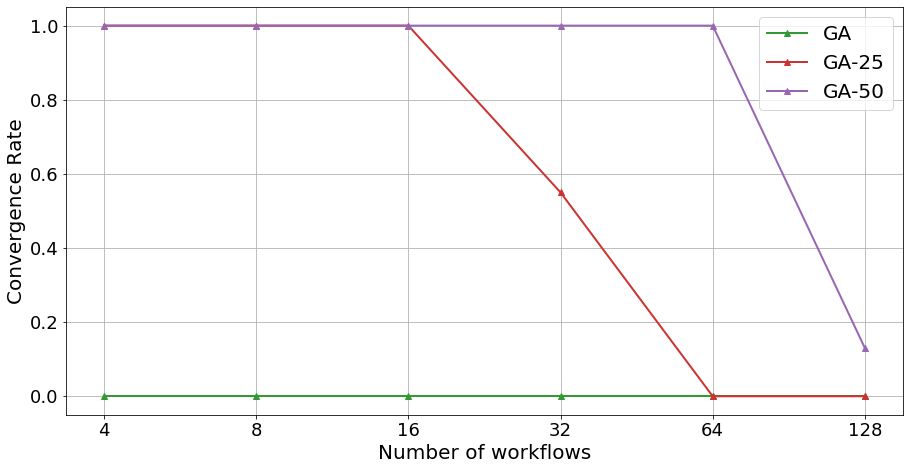

In [8]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(ConvGA.index, ConvGA['count'] / ConvGA['total'], color=tableau20(4), marker='^', label='GA', linewidth=2)
_ = axis.errorbar(ConvGA25.index, ConvGA25['count'] / ConvGA25['total'], color=tableau20(6),marker='^', label='GA-25',linewidth=2)
_ = axis.errorbar(ConvGA50.index, ConvGA50['count'] / ConvGA50['total'], color=tableau20(8),marker='^', label='GA-50',linewidth=2)
#_ = axis.errorbar([4, 8, 16, 32, 64, 128, 256, 512, 1024], min_vals, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_xscale('symlog', basex=2)
_ = axis.set_ylabel('Convergence Rate',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int'),fontsize=18)
_ = axis.set_yticklabels(np.around(axis.get_yticks().astype('float'), decimals=2),fontsize=18)
_ = axis.grid('on')
#_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#_ = fig.savefig('../Figures/StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
_ = fig.savefig('../Figures/HomogeResources_StHomogeCampaignsGAconv.pdf',bbox_inches='tight')